In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('ammo.txt', delim_whitespace=True, skiprows=24,comment='%',names='lat lon x y depth slip rake trup'.split())

df['L'] = 20e3
df['W'] = 16e3
df['reference'] = 'mid top'
df['depth'] *= 1000

df.loc[:210, 'dip'] = 12
df.loc[:210, 'strike'] = 315

df.loc[210:(210+408),'dip'] = 15
df.loc[210:(210+408),'strike'] = 342

df.loc[(210+408):,'dip'] = 17.5
df.loc[(210+408):,'strike'] = 5

In [4]:
df = df['lat lon depth slip dip rake strike L W reference'.split()]
df.head()

,lat,lon,depth,slip,dip,rake,strike,L,W,reference
0,1.9363,95.2389,3407.5,1.6727,12.0,66.9309,315.0,20000.0,16000.0,mid top
1,2.0636,95.1114,3407.5,1.9116,12.0,66.5734,315.0,20000.0,16000.0,mid top
2,2.1908,94.9839,3407.5,0.8661,12.0,70.9693,315.0,20000.0,16000.0,mid top
3,2.3181,94.8564,3407.5,0.0980,12.0,75.9351,315.0,20000.0,16000.0,mid top
4,2.4454,94.7289,3407.5,0.4615,12.0,117.4263,315.0,20000.0,16000.0,mid top


(91.264440099423268,
 96.791659900576747,
 1.3271612292444235,
 14.568238770755572)

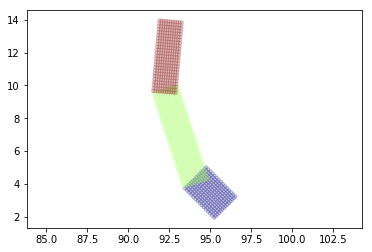

In [5]:
plt.scatter(df['lon'], df['lat'], c=df['dip'], s=10, cmap=plt.cm.jet, alpha=0.2)
plt.axis('equal')

In [6]:
df.to_csv('earthquake.csv')

In [7]:
from clawpack.geoclaw import dtopotools

In [8]:
fault = dtopotools.Fault()
fault.subfaults = []
df.loc[0,'lat']

for index, row in df.iterrows():
#     row = df.loc[0]
    usgs_subfault = dtopotools.SubFault()
    usgs_subfault.latitude = row['lat']
    usgs_subfault.longitude = row['lon']
    usgs_subfault.depth = row['depth']
    usgs_subfault.slip = row['slip']
    usgs_subfault.strike = row['strike']
    usgs_subfault.dip = row['dip']
    usgs_subfault.rake = row['rake']
    usgs_subfault.length = row['L']
    usgs_subfault.width = row['W']
    usgs_subfault.coordinate_specification = 'centroid'
    fault.subfaults.append(usgs_subfault)

In [9]:
fault.Mw()

9.0275757842378699